In [4]:
import torch

In [3]:
import torchvision

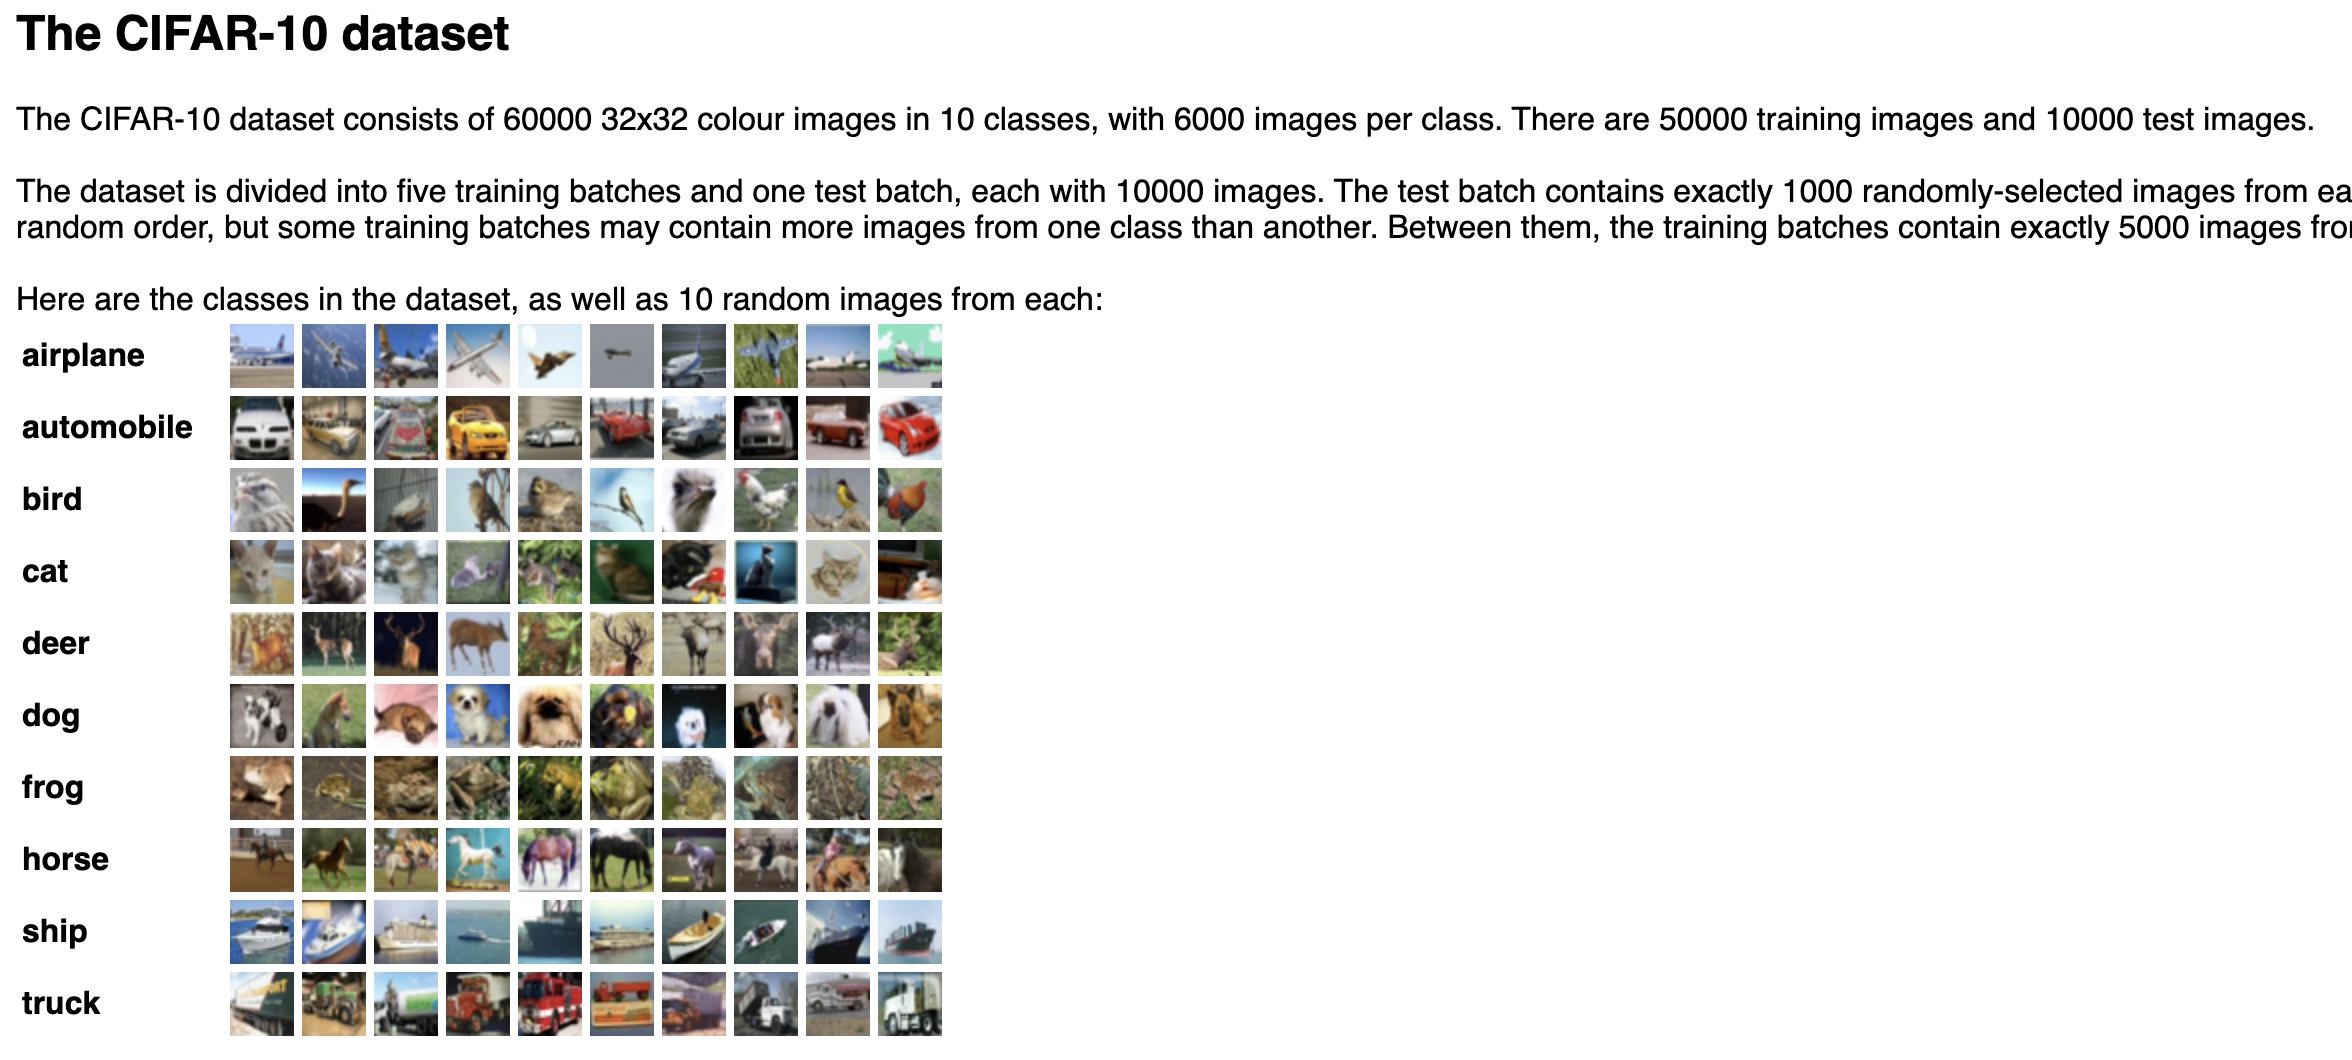

In [5]:
kind_and_index = [
    '飞机',
    '汽车',
    '小鸟',
    '猫咪',
    '小鹿',
    '小狗',
    '青蛙',
    '小马',
    '船舶',
    '卡车'
]

In [6]:
cifar_10 = torchvision.datasets.CIFAR10('.', download=True, transform=torchvision.transforms.ToTensor())

Extracting .\cifar-10-python.tar.gz to .


In [7]:
cifar_10_test = torchvision.datasets.CIFAR10('.', download=True, train=False, transform=torchvision.transforms.ToTensor())

Files already downloaded and verified


In [8]:
len(cifar_10)

50000

In [9]:
len(cifar_10_test)

10000

In [10]:
cifar_10[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [11]:
cifar_10[0][0].shape

torch.Size([3, 32, 32])

In [13]:
import matplotlib.pyplot as plt

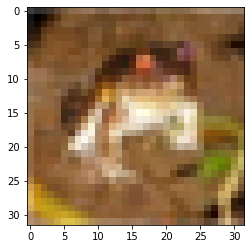

In [14]:
# 为了训练方便，第一个维度是channel，用.permute(1, 2, 0)把维度重新排序，第一个维度放在第0个，第二个维度放在第1个，第零个维度放在第2个
plt.imshow(cifar_10[0][0].permute(1, 2, 0))

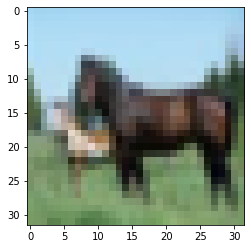

In [15]:
plt.imshow(cifar_10[12][0].permute(1, 2, 0))

## Splid Train and Validation

In [16]:
from torch.utils.data import random_split

In [17]:
# 拆分训练集与验证集
train, validation = random_split(cifar_10, lengths=( int(len(cifar_10) * 0.8), 
                                                     int(len(cifar_10) * 0.2)))

In [18]:
len(train)

40000

In [19]:
# 把数据随机打乱
train_loader = torch.utils.data.DataLoader(train,
                                          batch_size=4, # 每次取四个
                                          shuffle=True)

In [20]:
from torch import nn

In [21]:
??nn.Conv2d

Init signature:
nn.Conv2d(
    in_channels: int,
    out_channels: int,
    kernel_size: Union[int, Tuple[int, int]],
    stride: Union[int, Tuple[int, int]] = 1,
    padding: Union[int, Tuple[int, int]] = 0,
    dilation: Union[int, Tuple[int, int]] = 1,
    groups: int = 1,
    bias: bool = True,
    padding_mode: str = 'zeros',
)
Source:        
class Conv2d(_ConvNd):
    r"""Applies a 2D convolution over an input signal composed of several input
    planes.

    In the simplest case, the output value of the layer with input size
    :math:`(N, C_{\text{in}}, H, W)` and output :math:`(N, C_{\text{out}}, H_{\text{out}}, W_{\text{out}})`
    can be precisely described as:

    .. math::
        \text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) +
        \sum_{k = 0}^{C_{\text{in}} - 1} \text{weight}(C_{\text{out}_j}, k) \star \text{input}(N_i, k)


    where :math:`\star` is the valid 2D `cross-correlation`_ operator,
    :math:`N` is a batch size, :math:`C` denotes a 

In [22]:
# nn.Conv2d(
#     in_channels: int,                          # RGB--3
#     out_channels: int,                         # filters的个数
#     kernel_size: Union[int, Tuple[int, int]],  # filters的kernel
# )
conv = torch.nn.Conv2d(3, 16, kernel_size=3)

In [23]:
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [24]:
# 初始化权重
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[-0.1821, -0.0112, -0.1703],
                        [-0.0023,  0.0054,  0.1644],
                        [ 0.1859,  0.1336,  0.1676]],
              
                       [[-0.1461, -0.1533, -0.1636],
                        [ 0.0313, -0.1303, -0.1806],
                        [ 0.1305, -0.0884,  0.1354]],
              
                       [[ 0.1525,  0.0324, -0.1024],
                        [-0.0994, -0.0122, -0.1914],
                        [ 0.1332, -0.0970,  0.1043]]],
              
              
                      [[[ 0.0487,  0.0995, -0.0727],
                        [-0.1640,  0.0877, -0.0034],
                        [-0.1886,  0.1076,  0.1375]],
              
                       [[-0.0866,  0.1632,  0.1370],
                        [ 0.0056, -0.0480,  0.1261],
                        [-0.1233,  0.0924, -0.0972]],
              
                       [[-0.1455,  0.0422, -0.1466],
                        [-0.1723

In [25]:
# 16个filters,每个厚度是3,每个的size是3*3
conv.state_dict()['weight'].shape

torch.Size([16, 3, 3, 3])

In [26]:
conv1 = torch.nn.Conv2d(4, 15, kernel_size=2)

In [27]:
# 15个filters,每个厚度是4,每个的size是2*2
conv1.state_dict()['weight'].shape

torch.Size([15, 4, 2, 2])

In [28]:
img = train[0][0]

In [29]:
output = conv(img.unsqueeze(0))

In [31]:
output.shape

torch.Size([1, 16, 30, 30])

In [35]:
conv = nn.Conv2d(3, 1, kernel_size=3,padding=1)

In [36]:
output = conv(img.unsqueeze(0))

In [37]:
output.shape

torch.Size([1, 1, 32, 32])

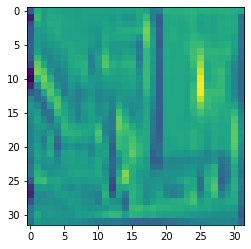

In [39]:
plt.imshow(output[0][0].detach())

In [40]:
import torch.nn.functional as F

In [41]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 10)
        self.softmax = nn.Softmax()

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2) # polling(tanh非线性变换(conv卷积))  MaxPool2d(kernel_size, stride=2) 32/2=16
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2) # 16/2=8
        out = out.view(-1, 8 * 8 * 8) # nn.Linear(8 * 8 * 8, 32)
        out = torch.tanh(self.fc1(out)) # nn.Linear(32, 10)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

In [42]:
model = ConvNet()

In [43]:
model(img.unsqueeze(0))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


tensor([[0.1193, 0.0927, 0.0922, 0.1015, 0.1081, 0.0981, 0.1038, 0.1048, 0.0938,
         0.0858]], grad_fn=<SoftmaxBackward>)

In [44]:
loss_fn = nn.CrossEntropyLoss()

In [45]:
from torch import optim

In [46]:
optimizer = optim.SGD(params=model.parameters(), lr=1e-2)

In [50]:
torch.cuda.is_available()

True

In [51]:
torch.device('cuda')

device(type='cuda')

In [52]:
losses = []

epochs = 20

for epoch in range(epochs):
    loss_train = 0
    for i, (imgs, labels) in enumerate(train_loader):
        outputs = model(imgs)
        
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step() # 更新
        
        loss_train += loss.item()
        
        if i > 0 and i % 5000 == 0:
            print('Epoch: {}, batch: {}'.format(epoch, i))
            print('-- loss: {}'.format(loss_train / i))
            
    losses.append(loss_train / len(train_loader))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Epoch: 0, batch: 5000
-- loss: 1.9613592154502868
Epoch: 1, batch: 5000
-- loss: 1.9441777924776078
Epoch: 2, batch: 5000
-- loss: 1.9319082194805146
Epoch: 3, batch: 5000
-- loss: 1.9215956497907638
Epoch: 4, batch: 5000
-- loss: 1.9158596757650375
Epoch: 5, batch: 5000
-- loss: 1.9046776528596878
Epoch: 6, batch: 5000
-- loss: 1.8965010798931121
Epoch: 7, batch: 5000
-- loss: 1.8865452113389969
Epoch: 8, batch: 5000
-- loss: 1.8839711896181106
Epoch: 9, batch: 5000
-- loss: 1.8742728237867354
Epoch: 10, batch: 5000
-- loss: 1.8677408299922944
Epoch: 11, batch: 5000
-- loss: 1.8582808665513992
Epoch: 12, batch: 5000
-- loss: 1.8464601834774017
Epoch: 13, batch: 5000
-- loss: 1.8443602171897888
Epoch: 14, batch: 5000
-- loss: 1.8391826480865479
Epoch: 15, batch: 5000
-- loss: 1.839267099905014
Epoch: 16, batch: 5000
-- loss: 1.8257593462467194
Epoch: 17, batch: 5000
-- loss: 1.82347497279644
Epoch: 18, batch: 5000
-- loss: 1.8250695494651794
Epoch: 19, batch: 5000
-- loss: 1.8119707817

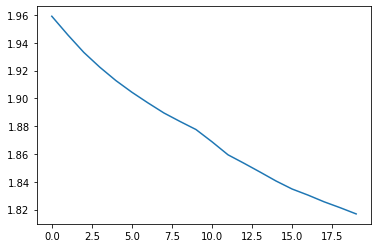

In [53]:
plt.plot(losses)

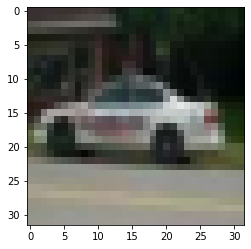

In [54]:
plt.imshow(validation[0][0].permute(1,2,0))

In [55]:
model(validation[0][0].unsqueeze(0))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


tensor([[4.2156e-02, 9.5626e-01, 1.1475e-03, 2.3534e-06, 9.3851e-05, 2.6449e-08,
         7.5553e-05, 4.9476e-05, 1.9793e-04, 2.1536e-05]],
       grad_fn=<SoftmaxBackward>)

In [56]:
torch.argmax(model(validation[0][0].unsqueeze(0)))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


tensor(1)

In [57]:
kind_and_index[torch.argmax(model(validation[0][0].unsqueeze(0)))]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


'汽车'

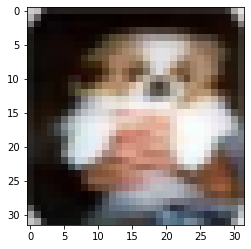

In [58]:
plt.imshow(validation[3][0].permute(1,2,0))

In [59]:
kind_and_index[torch.argmax(model(validation[3][0].unsqueeze(0)))]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


'小狗'

In [62]:
validation[5]

(tensor([[[0.6118, 0.6039, 0.6039,  ..., 0.9765, 0.9765, 0.9765],
          [0.6235, 0.6196, 0.6157,  ..., 0.9804, 0.9843, 0.9843],
          [0.6275, 0.6235, 0.6235,  ..., 0.9843, 0.9882, 0.9882],
          ...,
          [0.4196, 0.4902, 0.5412,  ..., 0.3176, 0.3804, 0.7059],
          [0.3098, 0.3255, 0.3569,  ..., 0.5608, 0.6824, 0.7529],
          [0.2627, 0.2706, 0.2667,  ..., 0.6902, 0.7176, 0.7137]],
 
         [[0.7412, 0.7294, 0.7294,  ..., 0.9765, 0.9765, 0.9765],
          [0.7569, 0.7451, 0.7412,  ..., 0.9843, 0.9843, 0.9843],
          [0.7569, 0.7490, 0.7490,  ..., 0.9804, 0.9804, 0.9882],
          ...,
          [0.4275, 0.4941, 0.5294,  ..., 0.2627, 0.3529, 0.6941],
          [0.3373, 0.3412, 0.3569,  ..., 0.4863, 0.6039, 0.7098],
          [0.2745, 0.2863, 0.2784,  ..., 0.6431, 0.6392, 0.6667]],
 
         [[0.9020, 0.8902, 0.8863,  ..., 0.9843, 0.9843, 0.9843],
          [0.9176, 0.9059, 0.9020,  ..., 0.9922, 0.9922, 0.9922],
          [0.9137, 0.9020, 0.9020,  ...,

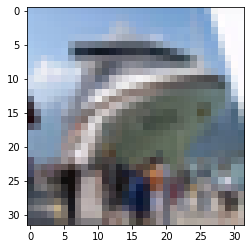

In [60]:
plt.imshow(validation[5][0].permute(1,2,0))

In [61]:
kind_and_index[torch.argmax(model(validation[5][0].unsqueeze(0)))]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


'小鸟'

In [65]:
validation[7]

(tensor([[[0.5294, 0.5961, 0.5882,  ..., 0.5137, 0.5059, 0.4275],
          [0.7137, 0.9098, 0.8627,  ..., 0.6980, 0.7059, 0.5569],
          [0.5843, 0.8510, 0.7294,  ..., 0.6980, 0.6549, 0.5490],
          ...,
          [0.3373, 0.3451, 0.3490,  ..., 0.4588, 0.4667, 0.3686],
          [0.2784, 0.2667, 0.2902,  ..., 0.4078, 0.3922, 0.3255],
          [0.2588, 0.2275, 0.2392,  ..., 0.2588, 0.2471, 0.2510]],
 
         [[0.4549, 0.5608, 0.5451,  ..., 0.4039, 0.4039, 0.3020],
          [0.7137, 0.9922, 0.8980,  ..., 0.6745, 0.6667, 0.4667],
          [0.5451, 0.8941, 0.7333,  ..., 0.6980, 0.6392, 0.4667],
          ...,
          [0.2196, 0.2667, 0.2706,  ..., 0.3647, 0.3882, 0.2667],
          [0.1608, 0.1882, 0.2039,  ..., 0.3098, 0.3059, 0.2235],
          [0.1176, 0.1098, 0.1176,  ..., 0.1294, 0.1333, 0.1294]],
 
         [[0.4549, 0.6039, 0.5804,  ..., 0.4392, 0.4000, 0.3333],
          [0.7216, 1.0000, 0.9137,  ..., 0.6980, 0.6549, 0.4941],
          [0.5137, 0.8706, 0.6863,  ...,

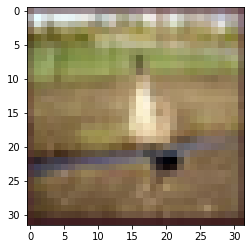

In [63]:
plt.imshow(validation[7][0].permute(1,2,0))

In [64]:
kind_and_index[torch.argmax(model(validation[7][0].unsqueeze(0)))]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


'猫咪'

## 模型的存储
+ 训练好的数据

In [66]:
data_path = 'model_saved'

In [67]:
import os

In [69]:
os.makedirs(data_path)

In [71]:
torch.save(model.state_dict(), os.path.join(data_path,'cifar_10_model.pt'))

## 从本地把存储好的模型加载进来

In [72]:
load_model = ConvNet()

In [73]:
load_model.load_state_dict(
    torch.load(os.path.join(data_path,'cifar_10_model.pt'))
)

<All keys matched successfully>

In [74]:
load_model(cifar_10_test[0][0].unsqueeze(0))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


tensor([[6.6787e-10, 7.9405e-09, 3.7249e-07, 6.4194e-01, 5.7364e-08, 3.5577e-01,
         2.2799e-03, 5.3588e-07, 5.4873e-06, 7.0038e-07]],
       grad_fn=<SoftmaxBackward>)

In [75]:
kind_and_index[torch.argmax(load_model(cifar_10_test[99][0].unsqueeze(0)))]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


'小马'

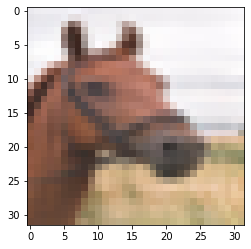

In [78]:
plt.imshow(cifar_10_test[99][0].permute((1, 2, 0)))

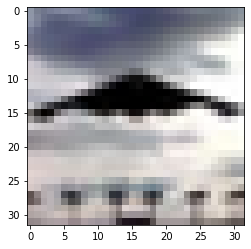

In [79]:
plt.imshow(cifar_10_test[111][0].permute((1, 2, 0)))

In [80]:
kind_and_index[torch.argmax(load_model(cifar_10_test[111][0].unsqueeze(0)))]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


'飞机'

In [82]:
from PIL import Image

In [84]:
unknow = Image.open(r'C:\Users\user\Desktop\BI\007\hx\009\lecture-09\dataset\unknow.jpeg')

In [85]:
unknow = unknow.resize((32, 32))

In [87]:
import numpy as np

In [88]:
unknow_data = np.array(unknow)

In [89]:
probs = load_model(torch.Tensor(np.array(unknow)).permute(2, 0, 1).unsqueeze(0))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


In [90]:
probs

tensor([[2.2771e-02, 3.7576e-06, 1.8037e-04, 1.0564e-02, 5.4164e-08, 9.5127e-01,
         1.0899e-08, 1.4947e-02, 3.1063e-05, 2.3705e-04]],
       grad_fn=<SoftmaxBackward>)

In [91]:
kind_and_index[torch.argmax(probs)]

'小狗'

In [93]:
# 第一层卷积学了什么
unknow_output_layer_01 = load_model.conv1(torch.Tensor(np.array(unknow)).permute(2, 0, 1).unsqueeze(0))

In [94]:
unknow_output_layer_01.shape

torch.Size([1, 16, 32, 32])

In [95]:
unknow_output_layer_01[0][0]

tensor([[-124.4776,  -33.6274,  -51.0484,  ...,  -18.4710,  -15.0303,
          -14.7090],
        [-269.1373, -117.6421, -134.4430,  ...,  -11.7058,  -17.1942,
          -33.1987],
        [-324.4044, -147.0557, -142.8068,  ...,  -10.8823,   -1.3053,
          -41.7651],
        ...,
        [-810.6076, -568.6381, -572.6287,  ...,  -45.2117,  -37.2417,
          -95.2168],
        [-805.8470, -570.3869, -574.1442,  ...,  -38.6640,  -29.6332,
          -87.7593],
        [-457.6379, -244.7546, -241.1637,  ...,   34.5642,   38.2192,
          -23.4317]], grad_fn=<SelectBackward>)

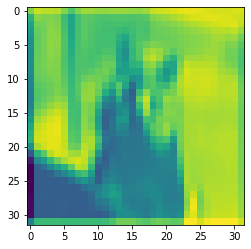

In [97]:
plt.imshow(unknow_output_layer_01[0][0].detach())

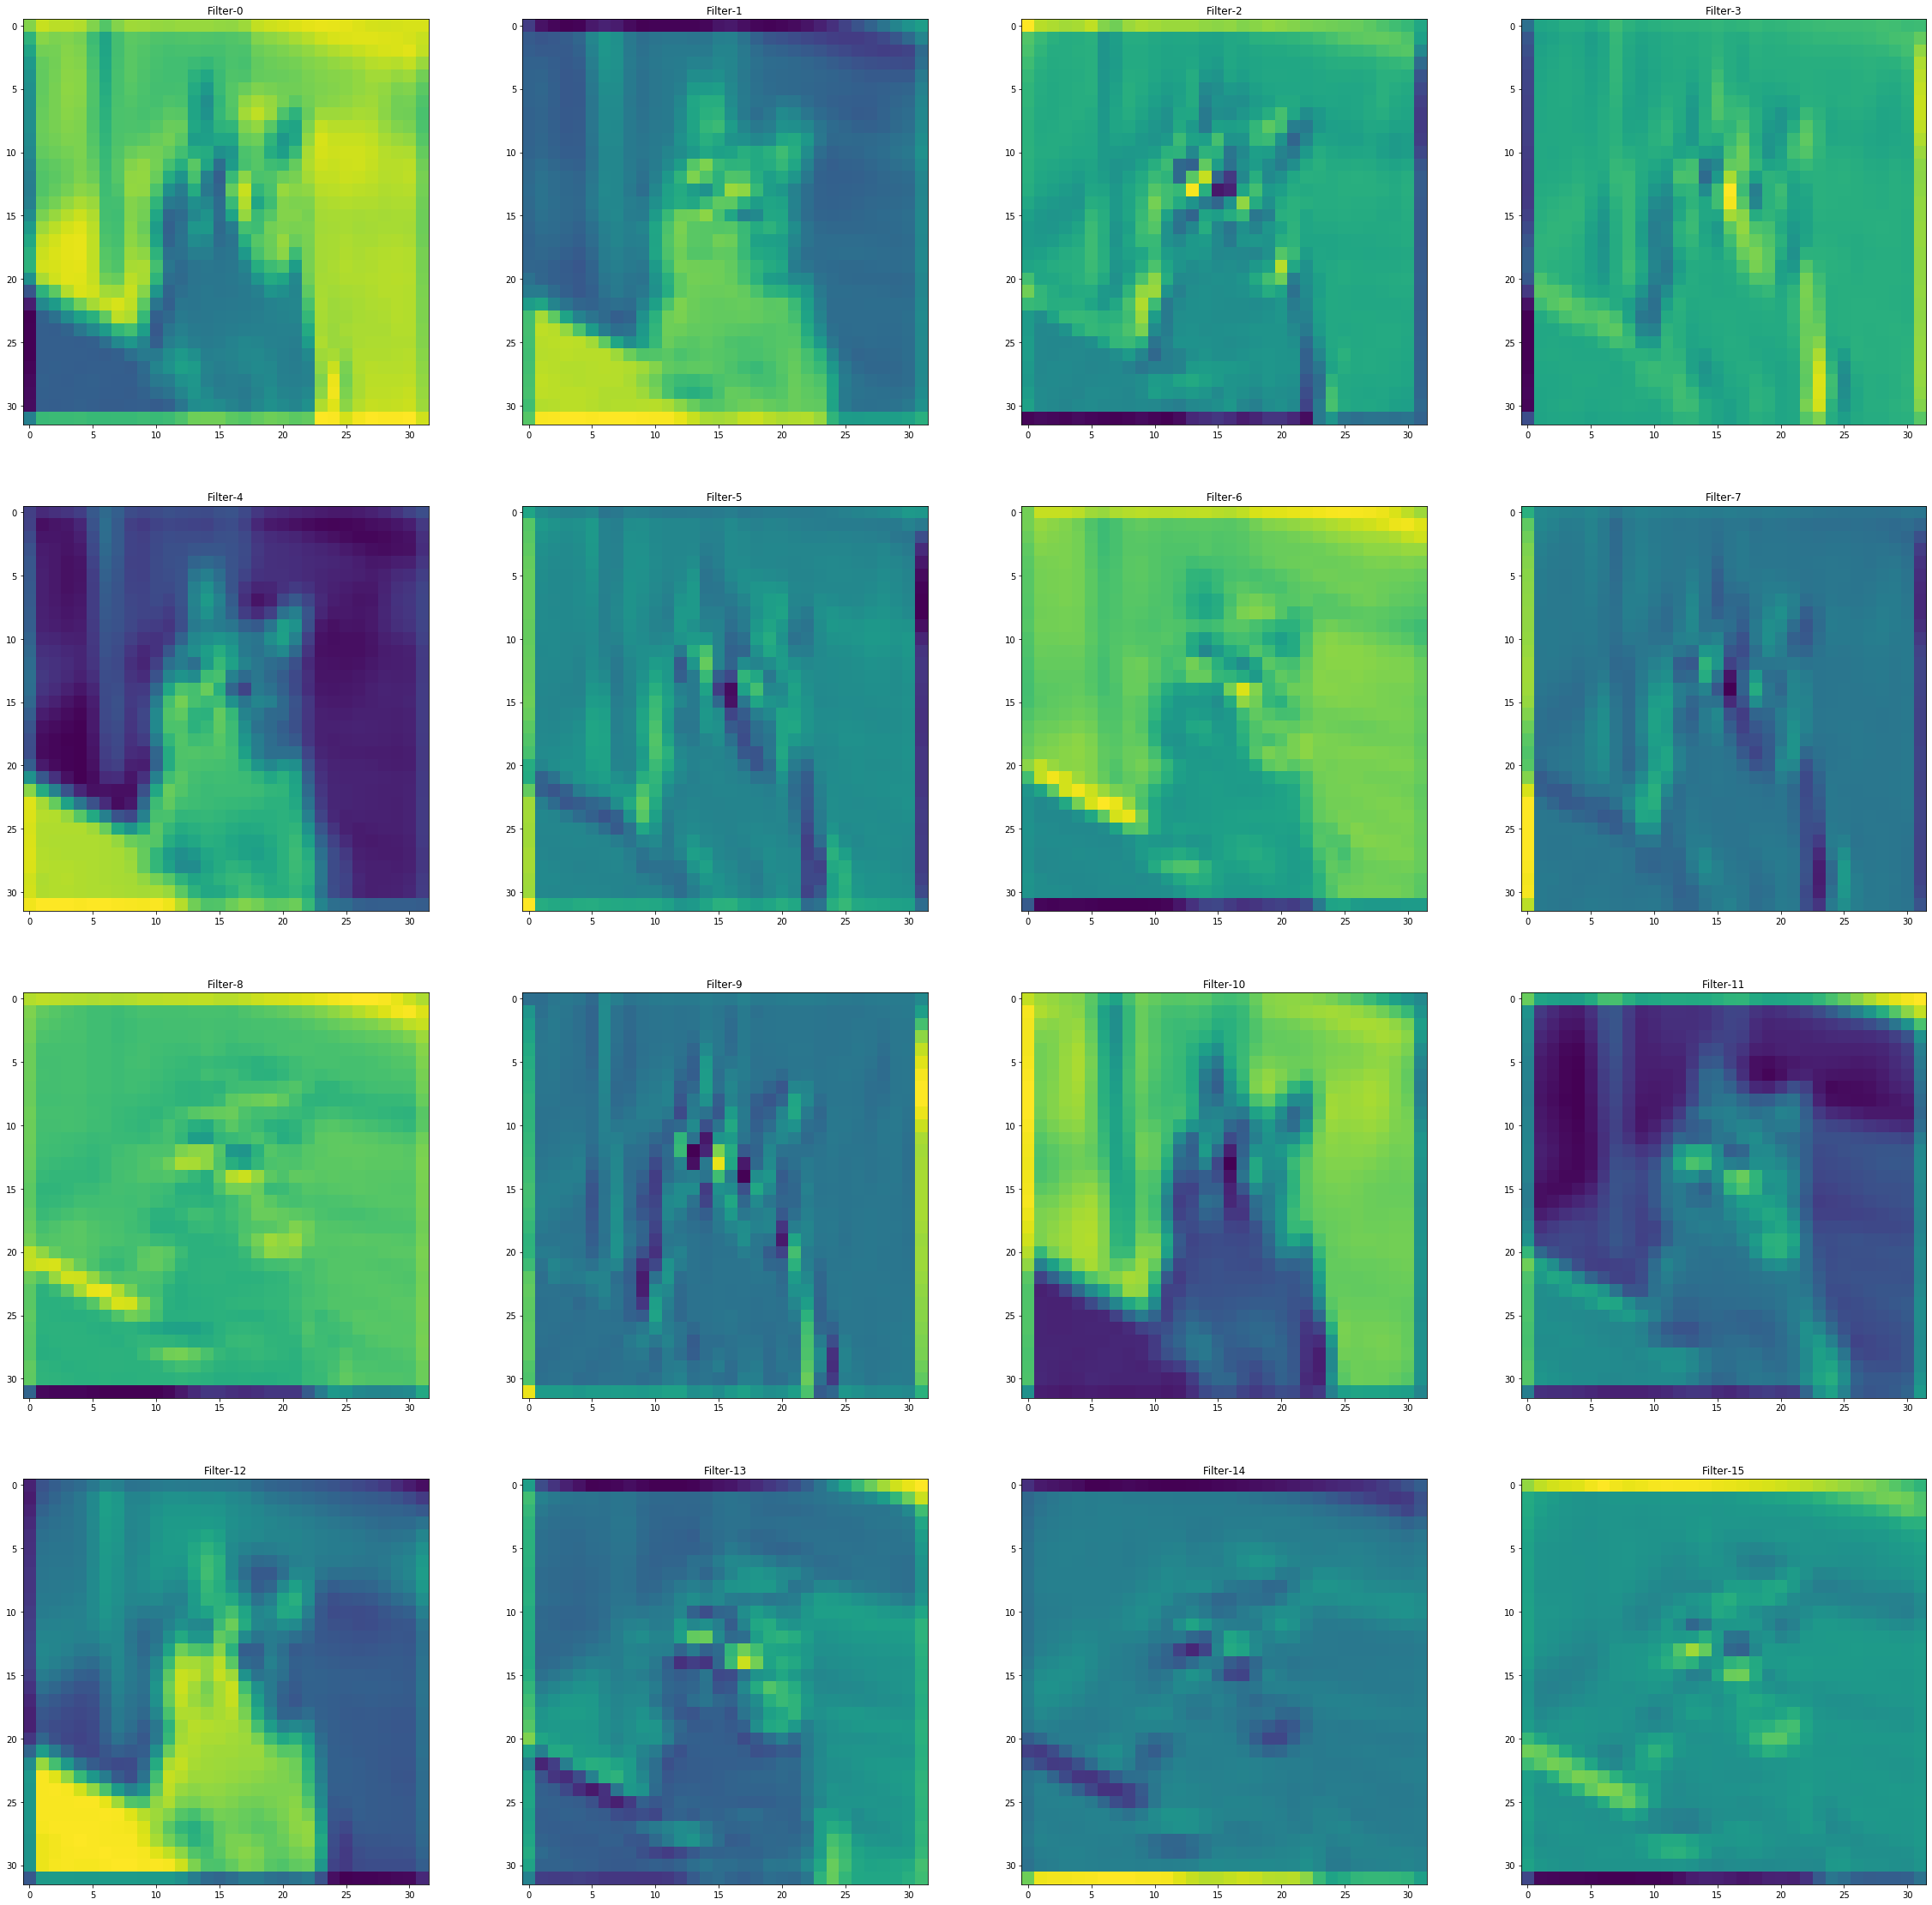

In [96]:
# 第一层卷积，共16个filters，看每一个卷积学了什么
width = 4

fig, ax = plt.subplots(unknow_output_layer_01[0].shape[0]//width, width, figsize=(40, 40))

for i in range(unknow_output_layer_01[0].shape[0]):
    ix = np.unravel_index(i, ax.shape)
    plt.sca(ax[ix])
    ax[ix].title.set_text('Filter-{}'.format(i))
    #plt.scatter(x[:, i], target)
    #plt.scatter(x[:, i], regression.predict(x))
    plt.imshow(unknow_output_layer_01[0][i].detach())

## 经过卷积发现，桌子对结果的影响比较大，权重比较大，
+ 处理权重时处理桌子
+ 截图时，不截桌子

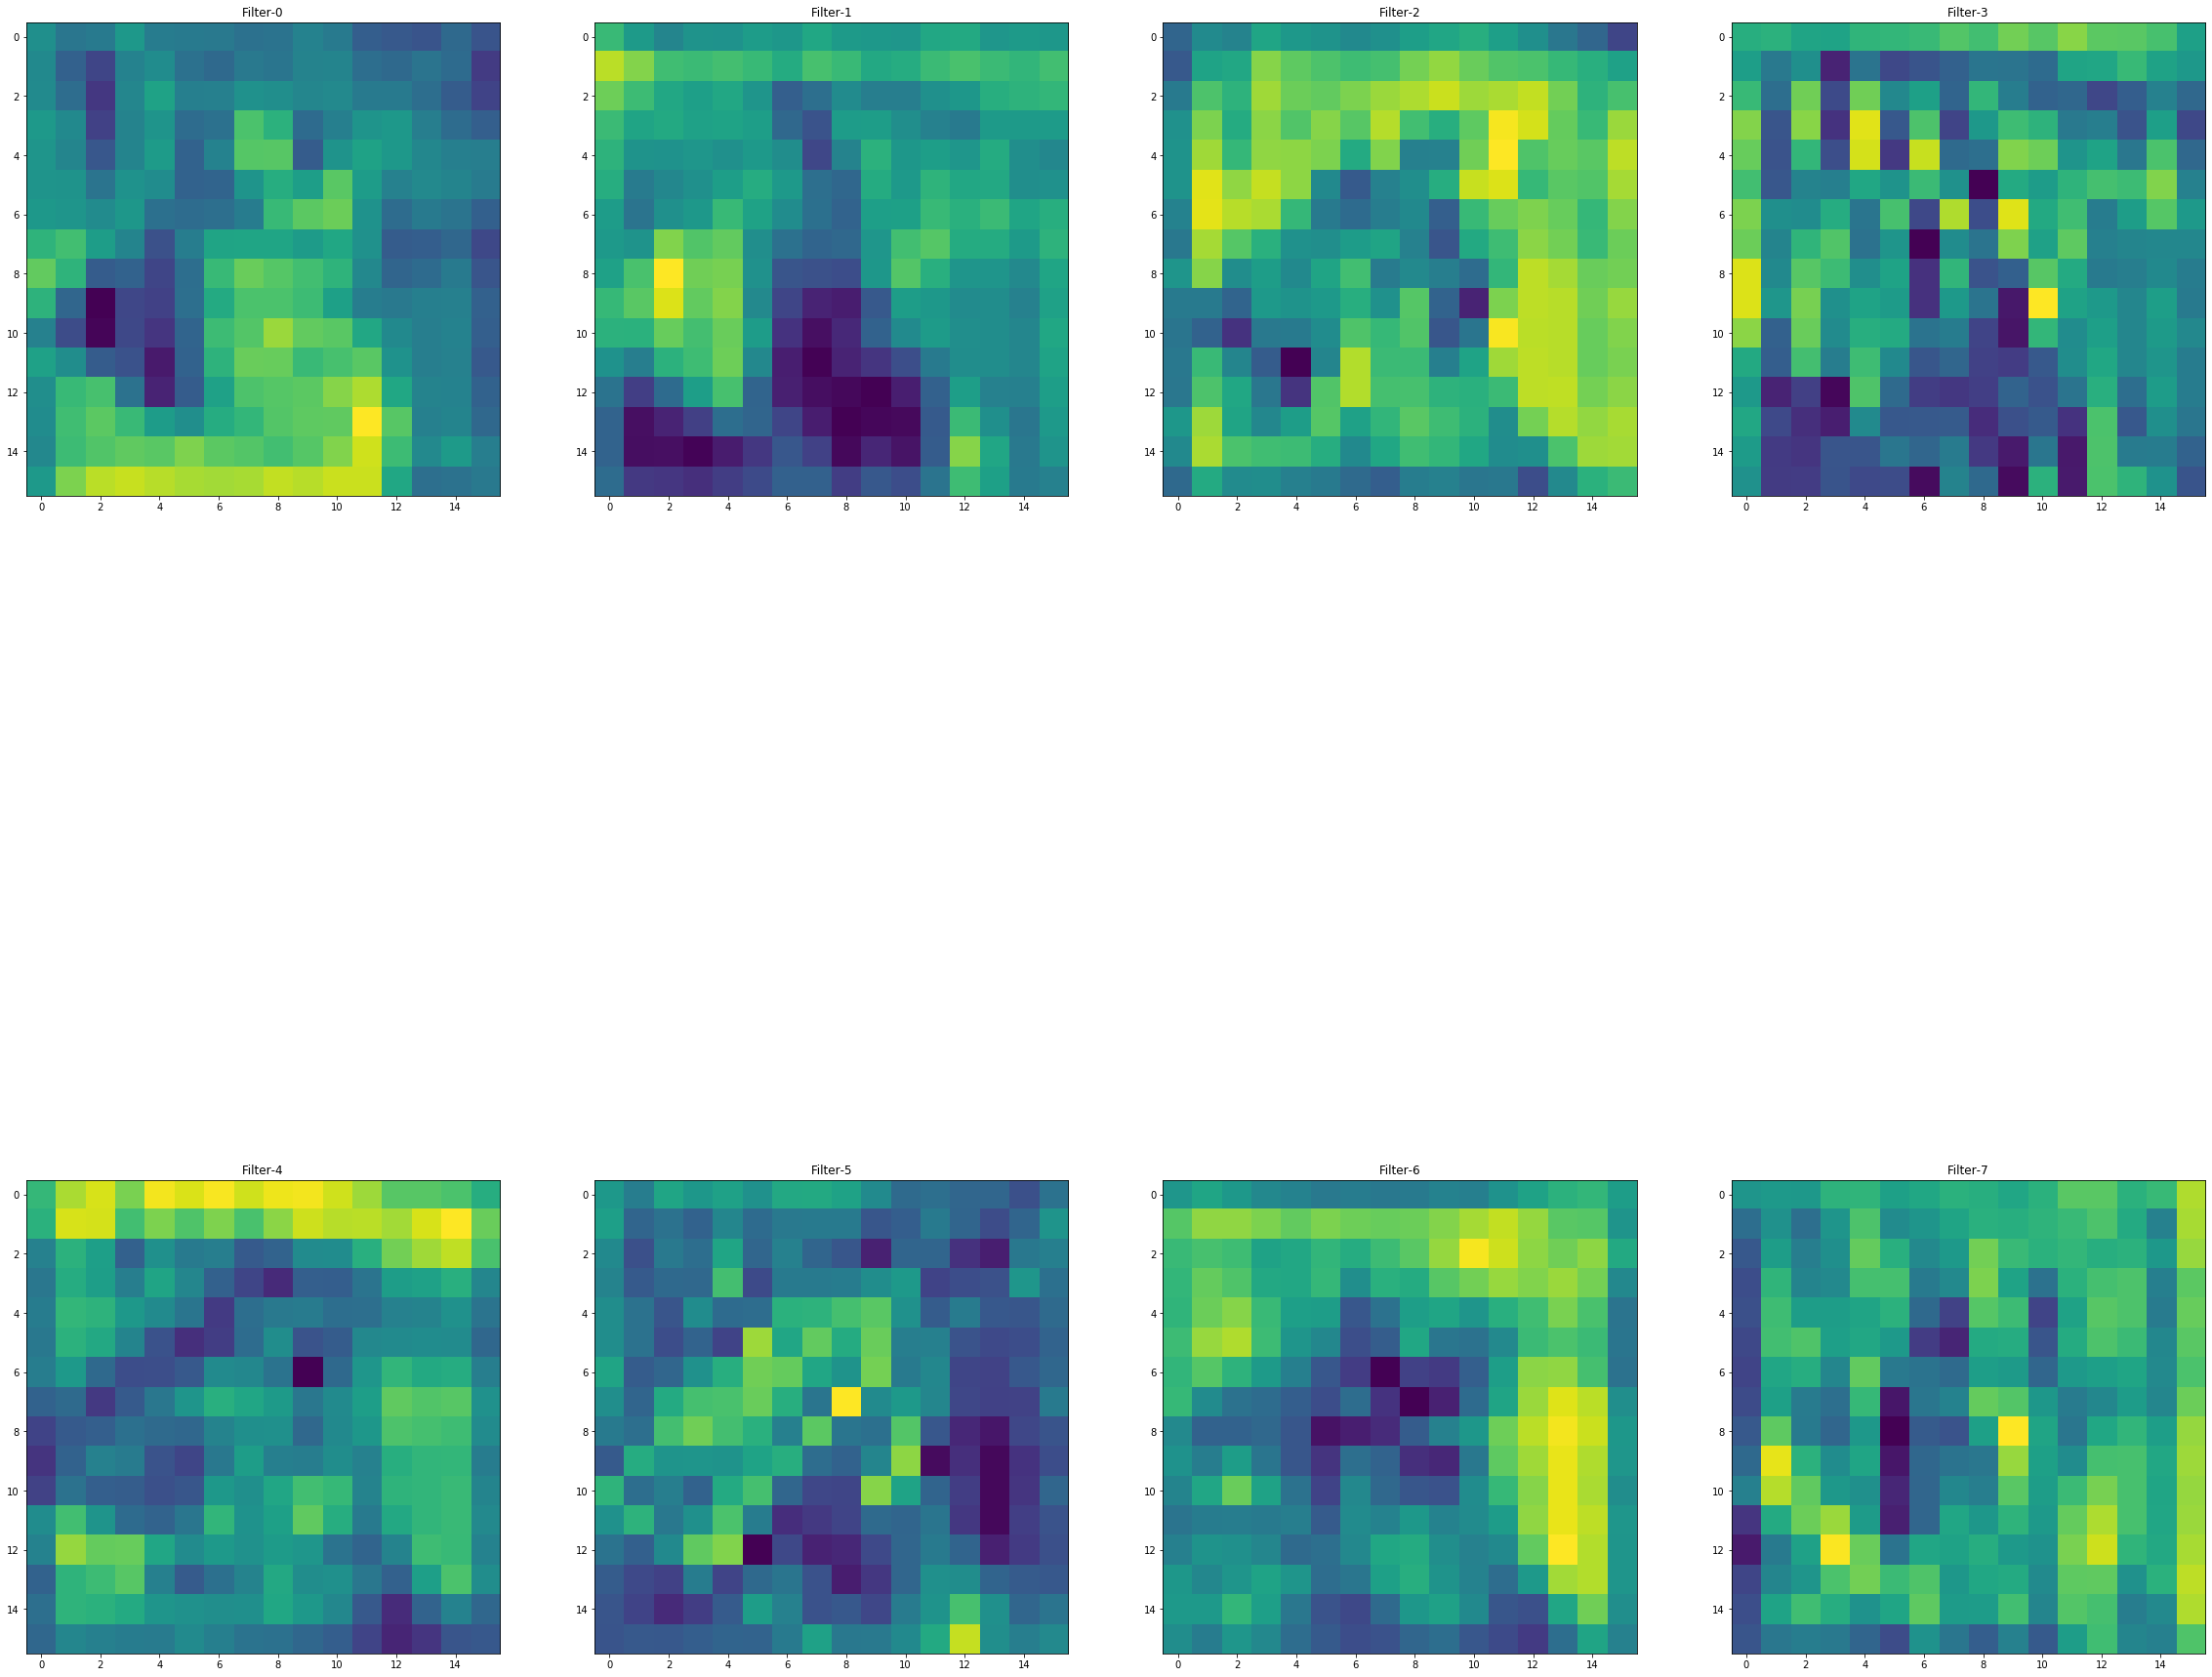

In [99]:
x = torch.Tensor(np.array(unknow)).permute(2, 0, 1).unsqueeze(0)

unknow_output_layer_01 = F.max_pool2d(torch.tanh(load_model.conv1(x)), 2)
unknow_output_layer_02 = model.conv2(unknow_output_layer_01)

width = 4

fig, ax = plt.subplots(unknow_output_layer_02[0].shape[0]//width, width, figsize=(40, 40))

for i in range(unknow_output_layer_02[0].shape[0]):
    ix = np.unravel_index(i, ax.shape)
    plt.sca(ax[ix])
    ax[ix].title.set_text('Filter-{}'.format(i))
    #plt.scatter(x[:, i], target)
    #plt.scatter(x[:, i], regression.predict(x))
    plt.imshow(unknow_output_layer_02[0][i].detach())

## Remain
+ 1.不同CNN结构的演化和对比
+ 2.Transfer Learning